In [2]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

import nltk
nltk.download('omw-1.4')

# importing modules
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

#

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\anton\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [5]:
stemmer = SnowballStemmer("porter")
lemmatizer = WordNetLemmatizer()

def remove_stopwords(abstract):
    stops = set(stopwords.words('english'))
    output= [i for i in abstract if not i in stops] 
    return output

def tokenize(abstract):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(abstract)

def lemma(abstract):
    lemmatized = []
    for w in abstract:
        if w.lower() == "copyright" or w.lower() == "c":
            break
        lemmatized.append(lemmatizer.lemmatize(w.lower()))
    return lemmatized

def stemming(abstract):
    # Change -> chang
    # Climate -> climat
    # We use Lemmatization instead
    stemmed = []
    for w in abstract:
        stemmed.append(stemmer.stem(w))
    return stemmed

def nlp(abstract):
    lst_text = lemma(remove_stopwords(tokenize(abstract)))
    return ' '.join(lst_text)

def clean_master(df):
    df = df[df.en != False]
    return df

def main():
    df = pd.read_csv('master.csv')
    df = clean_master(df)


    df["Clean_Abstract"] = df.apply(
        lambda x: nlp(x["Abstract"]), axis=1)
    
    df["Abstract_Length"] = df.apply(
        lambda x: len(x["Clean_Abstract"].split(" ")), axis=1)

    df.to_csv(
        r'master.csv', index=False)
    return df


In [39]:
create_new = False
if create_new:
    main()
else:
    print("SET create_new = True TO UPDATE master.csv")

SET create_new = True TO UPDATE master.csv


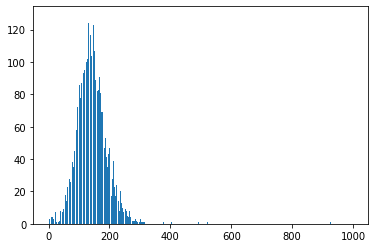

In [44]:
#Display distribution of abstract length

import matplotlib.pyplot as plt
df = pd.read_csv(r"master.csv")
sizes = {}

vals = []
for i in range(0, 1000):
    sizes[i] = 0

for index, row in df.iterrows():
    a = row["Abstract_Length"]
    sizes[a] += 1


data = sizes
names = list(data.keys())
values = list(data.values())

plt.bar(range(len(data)), values)
plt.show()
